<a href="https://colab.research.google.com/github/soumendu99/Zomato-Rating-prediction-using-ML/blob/main/SIP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Read Data


In [2]:
from google.colab import files
uploaded = files.upload()

Saving zomato_restraunt.csv to zomato_restraunt.csv


In [3]:
cd=pd.read_csv('zomato_restraunt.csv',encoding='latin-1')
cd.head()

,ï»¿RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Yes,No,No,No,3,314,1100,5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Yes,No,No,No,3,591,1200,5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,270,4000,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",No,No,No,No,4,365,1500,5
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Yes,No,No,No,4,229,1500,5


In [4]:
cd['Latitude']=round(cd['Latitude'],2)
cd['Longitude']=round(cd['Longitude'],2)
cd.head()

,ï»¿RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,"French, Japanese, Desserts",Yes,No,No,No,3,314,1100,5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.01,14.55,Japanese,Yes,No,No,No,3,591,1200,5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.06,14.58,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,270,4000,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.06,14.59,"Japanese, Sushi",No,No,No,No,4,365,1500,5
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.06,14.58,"Japanese, Korean",Yes,No,No,No,4,229,1500,5


In [5]:
cd.columns

Index(['ï»¿RestaurantID', 'RestaurantName', 'CountryCode', 'City', 'Address',
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Price_range', 'Votes', 'Average_Cost_for_two',
       'Rating'],
      dtype='object')

In [6]:
#outliers
q1,q3=np.percentile(cd['Average_Cost_for_two'],[25,75])
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
lower=np.where(cd['Average_Cost_for_two']<=q1)
upper=np.where(cd['Average_Cost_for_two']>=q3)
cd.drop(lower[0],inplace=True)
cd.drop(upper[0],inplace=True)



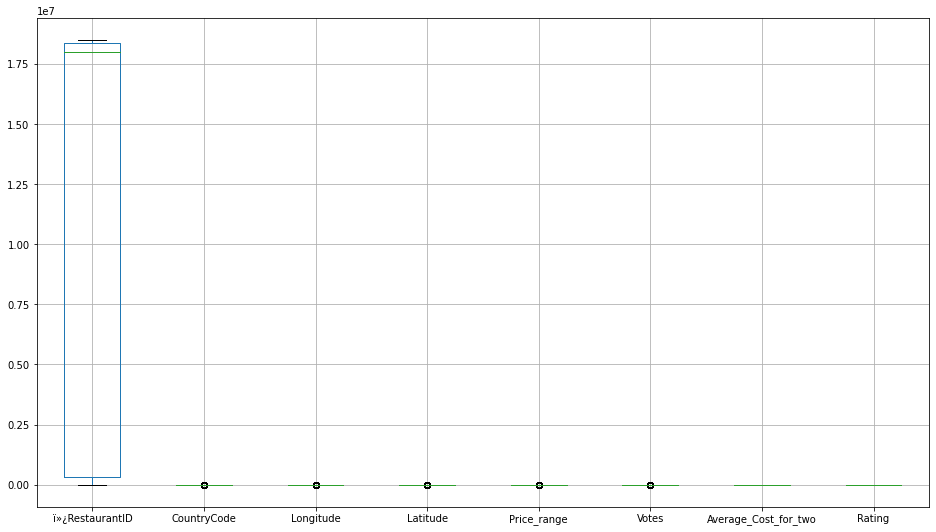

In [7]:
cd.boxplot(figsize=(16,9))

In [9]:
y=cd.iloc[:,-1]
x=cd.loc[:,['City', 
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two']]
x.head()


,City,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two
18,Taguig City,"BGC Stopover Pavillion, Bonifacio Global City","BGC Stopover Pavillion, Bonifacio Global City,...",121.05,14.55,"Cafe, Korean, Desserts",No,No,No,No,2,118,600
40,BrasÃ­_lia,"Shopping Iguatemi, Lago Norte","Shopping Iguatemi, Lago Norte, BrasÃ­_lia",-47.89,-15.72,Italian,No,No,No,No,4,8,350
59,Rio de Janeiro,Santa Teresa,"Santa Teresa, Rio de Janeiro",-43.19,-22.92,Brazilian,No,No,No,No,4,44,300
66,SÃ­Â£o Paulo,"Hotel Unique, Jardim Paulista","Hotel Unique, Jardim Paulista, SÃ­Â£o Paulo",-46.67,-23.58,"Beverages, International",No,No,No,No,4,59,300
72,SÃ­Â£o Paulo,Jardim Paulista,"Jardim Paulista, SÃ­Â£o Paulo",-46.67,-23.57,"BBQ, Grill, Brazilian",No,No,No,No,4,39,300


#Preprocessing


In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()

In [12]:
clm=['City', 'Locality', 'LocalityVerbose',  'Cuisines', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu']
for i in clm:
  x[i]=le.fit_transform(x[i])
x.head()

,City,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two
18,48,33,33,121.05,14.55,154,0,0,0,0,2,118,600
40,10,440,483,-47.89,-15.72,363,0,0,0,0,4,8,350
59,43,357,366,-43.19,-22.92,86,0,0,0,0,4,44,300
66,47,168,172,-46.67,-23.58,71,0,0,0,0,4,59,300
72,47,189,193,-46.67,-23.57,35,0,0,0,0,4,39,300


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

#Model selection with training and testing 

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lgr=LogisticRegression()
lgr_fit=lgr.fit(xtrain,ytrain)
lgr_predict=lgr_fit.predict(xtest)
lgr_predict

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 3, 3, ..., 1, 4, 1])

In [18]:
print('accuracy score:',accuracy_score(ytest,lgr_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,lgr_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,lgr_predict),'\n')

accuracy score: 0.7206537890044576 

confusion matrix:  
 [[292   0  38   0   0]
 [  0   0  27   3   0]
 [ 98   0 516  47   0]
 [  1   0 153 161   0]
 [  0   0   0   9   1]] 

classification_report:  
               precision    recall  f1-score   support

           1       0.75      0.88      0.81       330
           2       0.00      0.00      0.00        30
           3       0.70      0.78      0.74       661
           4       0.73      0.51      0.60       315
           5       1.00      0.10      0.18        10

    accuracy                           0.72      1346
   macro avg       0.64      0.46      0.47      1346
weighted avg       0.71      0.72      0.70      1346
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier(criterion='entropy')
dt_fit=dt.fit(xtrain,ytrain)
dt_predict=(dt_fit.predict(xtest))
dt_predict

array([3, 3, 3, ..., 1, 4, 3])

In [21]:
print('accuracy score:',accuracy_score(ytest,dt_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,dt_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,dt_predict),'\n')

accuracy score: 0.7964338781575037 

confusion matrix:  
 [[330   0   0   0   0]
 [  0   3  21   6   0]
 [  0  23 519 118   1]
 [  0   9  84 216   6]
 [  0   0   0   6   4]] 

classification_report:  
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       330
           2       0.09      0.10      0.09        30
           3       0.83      0.79      0.81       661
           4       0.62      0.69      0.65       315
           5       0.36      0.40      0.38        10

    accuracy                           0.80      1346
   macro avg       0.58      0.59      0.59      1346
weighted avg       0.80      0.80      0.80      1346
 



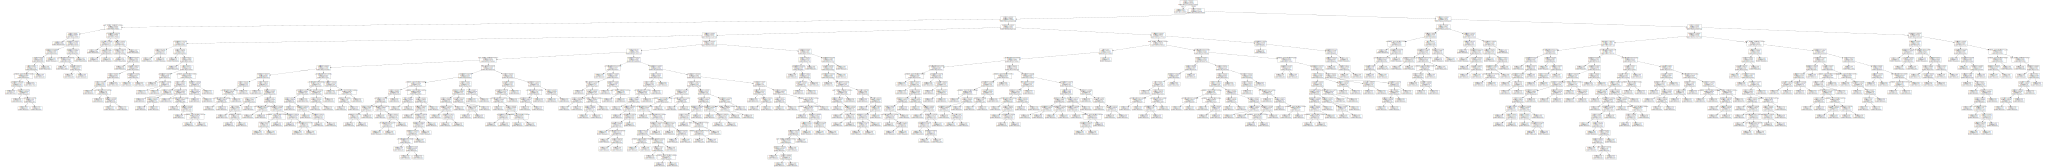

In [22]:
from sklearn.tree import export_graphviz
import graphviz
grf=export_graphviz(dt_fit,out_file=None,feature_names=x.columns)
graph=graphviz.Source(grf)
graph

In [23]:
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.940472 to fit


'dtree_render.png'

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier(n_estimators=30)
rfc_fit=rfc.fit(xtrain,ytrain)
rfc_predict=rfc_fit.predict(xtest)
rfc_predict

array([3, 3, 3, ..., 1, 3, 3])

In [26]:
print('accuracy score:',accuracy_score(ytest,rfc_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,rfc_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,rfc_predict),'\n')

accuracy score: 0.8380386329866271 

confusion matrix:  
 [[330   0   0   0   0]
 [  0   1  24   5   0]
 [  0   6 584  71   0]
 [  0   0 101 213   1]
 [  0   0   0  10   0]] 

classification_report:  
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       330
           2       0.14      0.03      0.05        30
           3       0.82      0.88      0.85       661
           4       0.71      0.68      0.69       315
           5       0.00      0.00      0.00        10

    accuracy                           0.84      1346
   macro avg       0.54      0.52      0.52      1346
weighted avg       0.82      0.84      0.83      1346
 



Support Vector Machine

In [27]:
from sklearn.svm import SVC

In [28]:
svc=SVC()
svc_fit=svc.fit(xtrain,ytrain)
svc_predict=svc_fit.predict(xtest)
svc_predict

array([3, 3, 3, ..., 3, 4, 3])

In [29]:
print('accuracy score:',accuracy_score(ytest,svc_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,svc_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,svc_predict),'\n')

accuracy score: 0.6329866270430906 

confusion matrix:  
 [[157   0 172   1   0]
 [  1   0  26   3   0]
 [ 87   0 527  47   0]
 [  8   0 138 168   1]
 [  0   0   0  10   0]] 

classification_report:  
               precision    recall  f1-score   support

           1       0.62      0.48      0.54       330
           2       0.00      0.00      0.00        30
           3       0.61      0.80      0.69       661
           4       0.73      0.53      0.62       315
           5       0.00      0.00      0.00        10

    accuracy                           0.63      1346
   macro avg       0.39      0.36      0.37      1346
weighted avg       0.62      0.63      0.62      1346
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes

In [30]:
from  sklearn.naive_bayes import GaussianNB

In [31]:
gnb=GaussianNB()
gnb_fit=gnb.fit(xtrain,ytrain)
gnb_predict=gnb_fit.predict(xtest)
gnb_predict

array([2, 2, 2, ..., 2, 5, 2])

In [32]:
print('accuracy score:',accuracy_score(ytest,svc_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,svc_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,svc_predict),'\n')

accuracy score: 0.6329866270430906 

confusion matrix:  
 [[157   0 172   1   0]
 [  1   0  26   3   0]
 [ 87   0 527  47   0]
 [  8   0 138 168   1]
 [  0   0   0  10   0]] 

classification_report:  
               precision    recall  f1-score   support

           1       0.62      0.48      0.54       330
           2       0.00      0.00      0.00        30
           3       0.61      0.80      0.69       661
           4       0.73      0.53      0.62       315
           5       0.00      0.00      0.00        10

    accuracy                           0.63      1346
   macro avg       0.39      0.36      0.37      1346
weighted avg       0.62      0.63      0.62      1346
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K Nearest Neighbor

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_fit=knn.fit(xtrain,ytrain)
knn_predict=knn_fit.predict(xtest)
knn_predict

array([3, 1, 3, ..., 3, 3, 3])

In [35]:
print('accuracy score:',accuracy_score(ytest,knn_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,knn_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,knn_predict),'\n')

accuracy score: 0.575780089153046 

confusion matrix:  
 [[195   0 133   2   0]
 [  3   0  25   2   0]
 [176   4 437  44   0]
 [ 24   3 145 143   0]
 [  0   0   0  10   0]] 

classification_report:  
               precision    recall  f1-score   support

           1       0.49      0.59      0.54       330
           2       0.00      0.00      0.00        30
           3       0.59      0.66      0.62       661
           4       0.71      0.45      0.55       315
           5       0.00      0.00      0.00        10

    accuracy                           0.58      1346
   macro avg       0.36      0.34      0.34      1346
weighted avg       0.58      0.58      0.57      1346
 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boost

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb=GradientBoostingClassifier()
gb_fit=gb.fit(xtrain,ytrain)
gb_predict=gb_fit.predict(xtest)
gb_predict

array([3, 3, 3, ..., 1, 4, 3])

In [38]:
print('accuracy score:',accuracy_score(ytest,gb_predict),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,gb_predict),'\n')
print('classification_report: ','\n',classification_report(ytest,gb_predict),'\n')

accuracy score: 0.8536404160475483 

confusion matrix:  
 [[330   0   0   0   0]
 [  0   1  24   5   0]
 [  0   2 589  70   0]
 [  0   0  86 225   4]
 [  0   0   0   6   4]] 

classification_report:  
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       330
           2       0.33      0.03      0.06        30
           3       0.84      0.89      0.87       661
           4       0.74      0.71      0.72       315
           5       0.50      0.40      0.44        10

    accuracy                           0.85      1346
   macro avg       0.68      0.61      0.62      1346
weighted avg       0.84      0.85      0.84      1346
 



# Classification Report

In [39]:
print('Logistic Regression:','\n',classification_report(ytest,lgr_predict),'\n')
print('Decision Tree: ','\n',classification_report(ytest,dt_predict),'\n')
print('Random Forest: ','\n',classification_report(ytest,rfc_predict),'\n')
print('Naive Bayes: ','\n',classification_report(ytest,gnb_predict),'\n')
print('Support Vector Machine: ','\n',classification_report(ytest,svc_predict),'\n')
print('K Nearest Neighbor: ','\n',classification_report(ytest,knn_predict),'\n')
print('Gradient Boost: ','\n',classification_report(ytest,gb_predict),'\n')

Logistic Regression: 
               precision    recall  f1-score   support

           1       0.75      0.88      0.81       330
           2       0.00      0.00      0.00        30
           3       0.70      0.78      0.74       661
           4       0.73      0.51      0.60       315
           5       1.00      0.10      0.18        10

    accuracy                           0.72      1346
   macro avg       0.64      0.46      0.47      1346
weighted avg       0.71      0.72      0.70      1346
 

Decision Tree:  
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       330
           2       0.09      0.10      0.09        30
           3       0.83      0.79      0.81       661
           4       0.62      0.69      0.65       315
           5       0.36      0.40      0.38        10

    accuracy                           0.80      1346
   macro avg       0.58      0.59      0.59      1346
weighted avg       0.80      0.80 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

#Data Visualization

Confusion Matrix


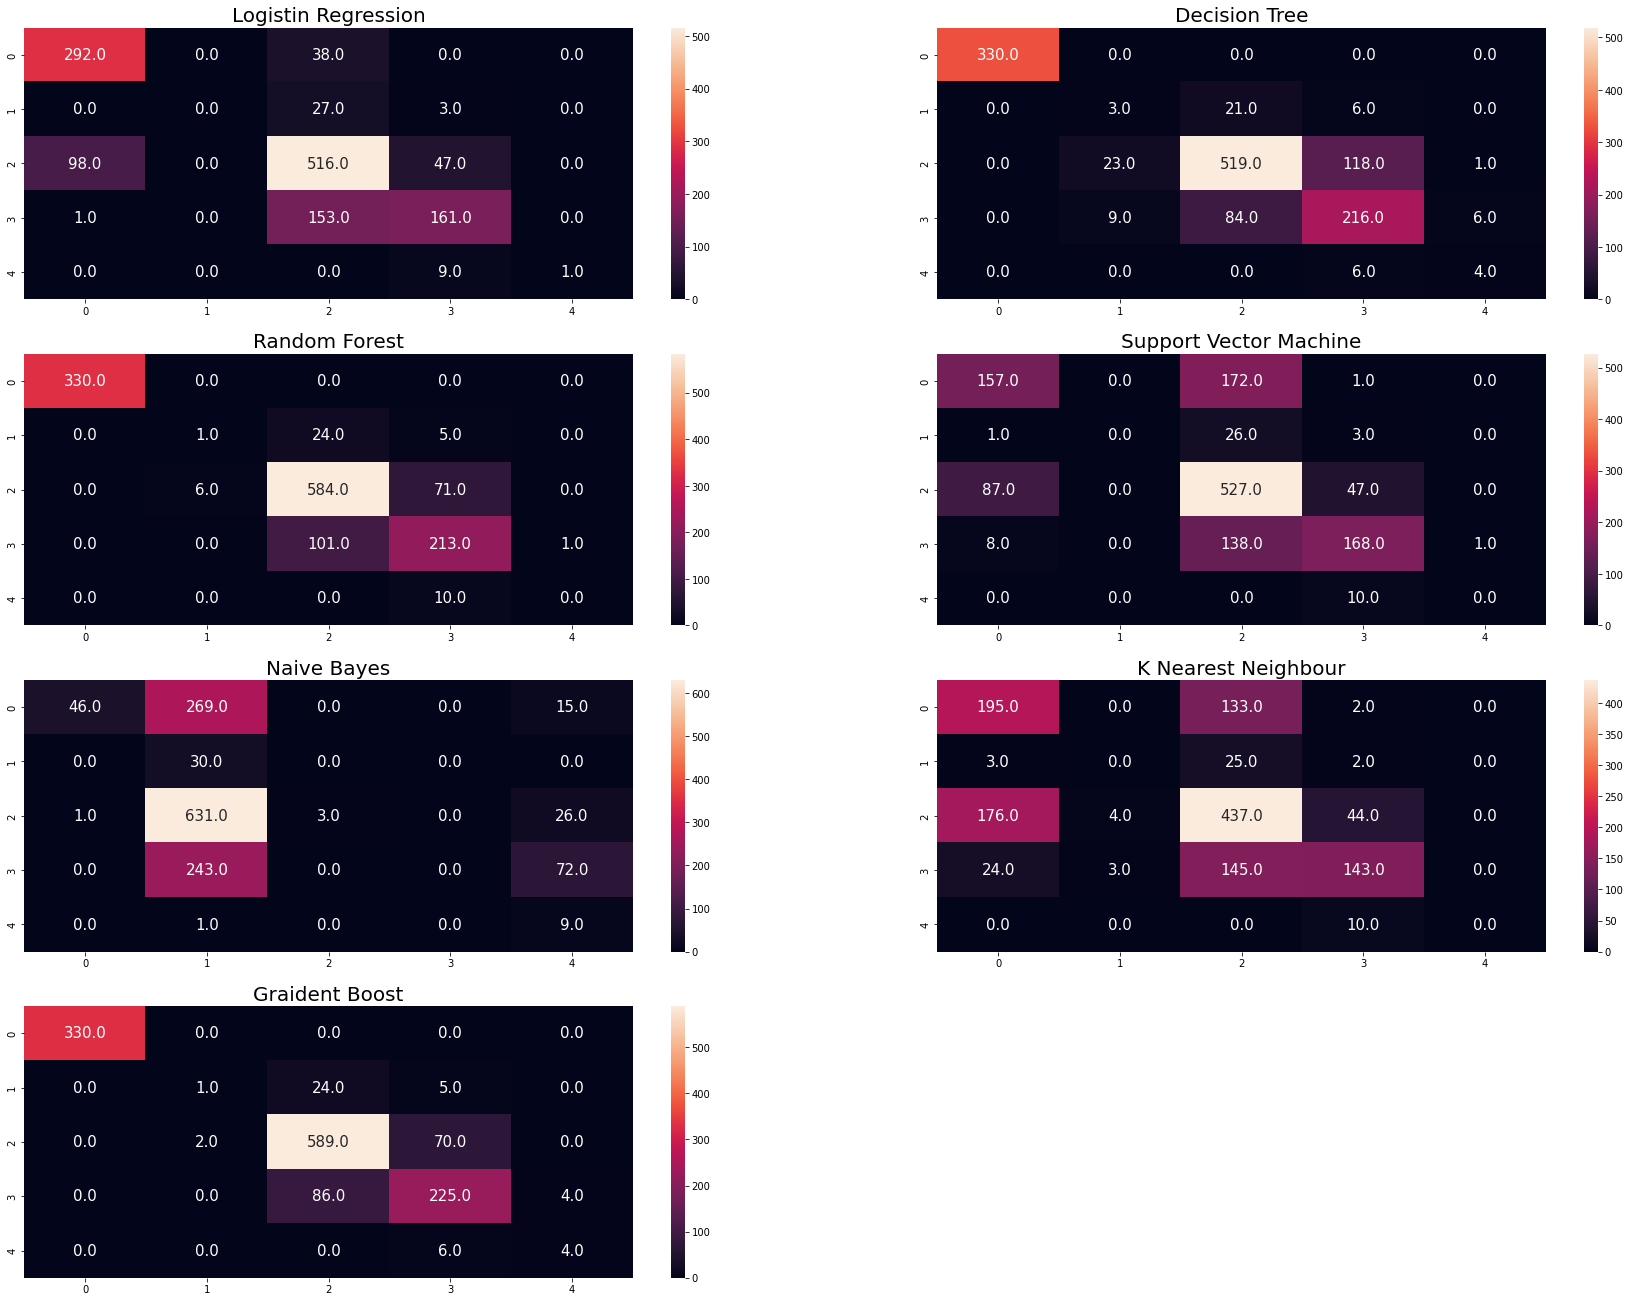

In [40]:
plt.figure(figsize=(30,23))
plt.subplot(4,2,1)
sb.heatmap(confusion_matrix(ytest,lgr_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('Logistin Regression',fontsize = 20)
plt.subplot(4,2,2)
sb.heatmap(confusion_matrix(ytest,dt_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('Decision Tree',fontsize = 20)
plt.subplot(4,2,3)
sb.heatmap(confusion_matrix(ytest,rfc_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('Random Forest',fontsize = 20)
plt.subplot(4,2,4)
sb.heatmap(confusion_matrix(ytest,svc_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('Support Vector Machine',fontsize = 20)
plt.subplot(4,2,5)
sb.heatmap(confusion_matrix(ytest,gnb_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('Naive Bayes',fontsize = 20)
plt.subplot(4,2,6)
sb.heatmap(confusion_matrix(ytest,knn_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('K Nearest Neighbour',fontsize = 20)
plt.subplot(4,2,7)
sb.heatmap(confusion_matrix(ytest,gb_predict),annot=True,fmt='.1f',annot_kws={'size': 15})
plt.title('Graident Boost',fontsize = 20)
plt.show()

Predict best model

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr='False Positive Rate'
tpr='True Possitive Rate'
thrs='Thresshold'
lgr_fpr,lgr_tpr,lgr_thrs=roc_curve(ytest,lgr_predict, pos_label=1)
dt_fpr,dt_tpr,dt_thrs=roc_curve(ytest,dt_predict, pos_label=1)
rfc_fpr,rfc_tpr,rfc_thrs=roc_curve(ytest,rfc_predict, pos_label=1)
gnb_fpr,gnb_tpr,gnb_thrs=roc_curve(ytest,gnb_predict, pos_label=1)
svc_fpr,svc_tpr,svc_thrs=roc_curve(ytest,svc_predict, pos_label=1)
knn_fpr,knn_tpr,knn_thrs=roc_curve(ytest,knn_predict, pos_label=1)
gb_fpr,gb_tpr,gb_thrs=roc_curve(ytest,gb_predict, pos_label=1)

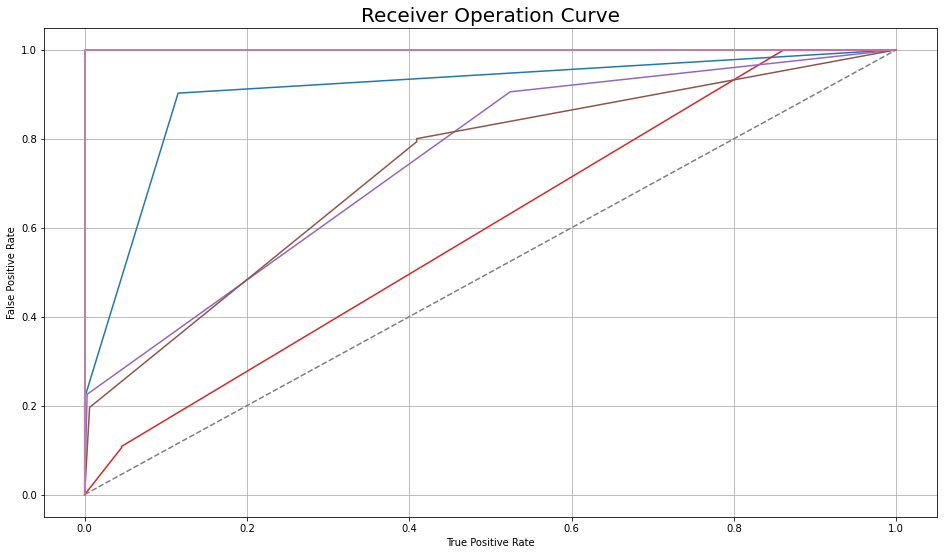

In [43]:
plt.figure(figsize=(16,9))
plt.plot(lgr_tpr,lgr_fpr,label='Logistic Regression')
plt.plot(dt_tpr,dt_fpr,label='Decision Tree')
plt.plot(rfc_tpr,rfc_fpr,label='Random Forest')
plt.plot(gnb_tpr,gnb_fpr,label='Naive Bayes')
plt.plot(svc_tpr,svc_fpr,label='Support Vector Machine')
plt.plot(knn_tpr,knn_fpr,label='K Nearest Neighbor')
plt.plot(gb_tpr,gb_fpr,label='Gradient Boost')
plt.plot([0,1],linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('Receiver Operation Curve',fontsize=20)
plt.grid(True)
plt.show()

Accuracy Score

In [44]:
Model_name=['Logistic Regression','Decision Tree','Rnandom Forest','Naive Bayes','Support Vector Machine','K Nearest Neighbor','Gradient Boost']
ML_Model=[round(accuracy_score(ytest,lgr_predict)*100,2),
          round(accuracy_score(ytest,dt_predict)*100,2),
          round(accuracy_score(ytest,rfc_predict)*100,2),
          round(accuracy_score(ytest,gnb_predict)*100,2),
          round(accuracy_score(ytest,svc_predict)*100,2),
          round(accuracy_score(ytest,knn_predict)*100,2),
          round(accuracy_score(ytest,gb_predict)*100,2)]
Acc_score=pd.DataFrame({'Model name':Model_name,'Accuracy Score (in %)':ML_Model})
Acc_score

,Model name,Accuracy Score (in %)
0,Logistic Regression,72.07
1,Decision Tree,79.64
2,Rnandom Forest,83.80
3,Naive Bayes,6.54
4,Support Vector Machine,63.30
5,K Nearest Neighbor,57.58
6,Gradient Boost,85.36


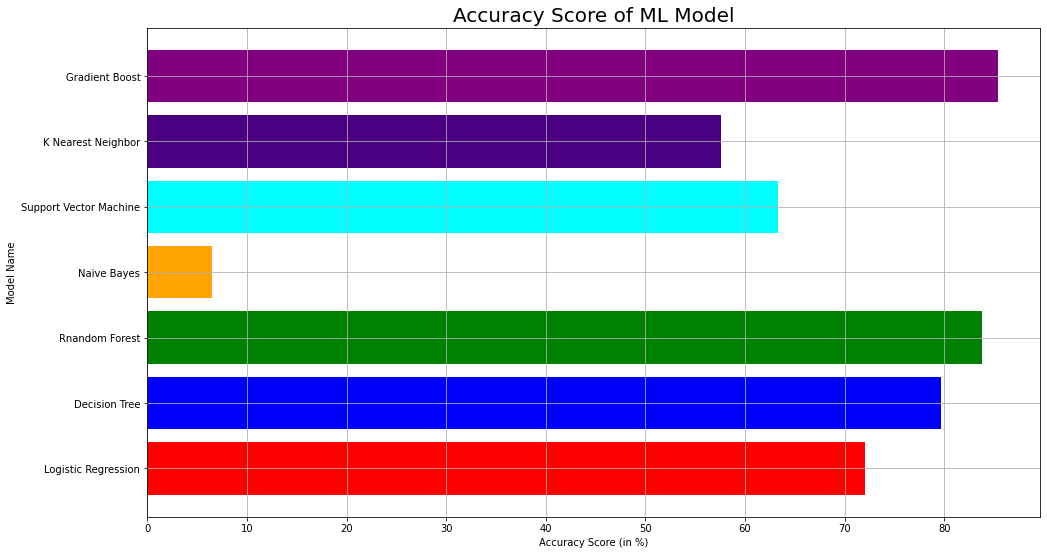

In [45]:
plt.figure(figsize=(16,9))
plt.barh(Acc_score['Model name'],Acc_score['Accuracy Score (in %)'],color=['red','blue','green','orange','cyan','indigo','purple'])
plt.grid()
plt.xlabel('Accuracy Score (in %)')
plt.ylabel('Model Name')
plt.title('Accuracy Score of ML Model',fontsize=20)
plt.show()

#Combine all ML Model

In [46]:
Model_name={'Logistic Regression':lgr,
            'Decision Tree':dt,
            'Rnandom Forest':rfc,
            'Naive Bayes':gnb,
            'Support Vector Machine':svc,
            'K Nearest Neighbor':knn,
            'Gradient Boost':gb}

In [47]:
for Model in Model_name:
  mdl=Model_name[Model]
  fit=mdl.fit(xtrain,ytrain)
  predict=fit.predict(xtest)

predict

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 3, 3, ..., 1, 4, 3])

In [48]:
print('accuracy score (in %):',round(accuracy_score(ytest,predict)*100,2),'\n')
print('confusion matrix: ','\n',confusion_matrix(ytest,predict),'\n')
print('classification_report: ','\n',classification_report(ytest,predict),'\n')

accuracy score (in %): 85.14 

confusion matrix:  
 [[330   0   0   0   0]
 [  0   1  24   5   0]
 [  0   2 587  71   1]
 [  0   0  86 224   5]
 [  0   0   0   6   4]] 

classification_report:  
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       330
           2       0.33      0.03      0.06        30
           3       0.84      0.89      0.86       661
           4       0.73      0.71      0.72       315
           5       0.40      0.40      0.40        10

    accuracy                           0.85      1346
   macro avg       0.66      0.61      0.61      1346
weighted avg       0.84      0.85      0.84      1346
 



#                         The End
